=== Cantidad de motos por tipo de moto ===
TIPO_SIMPLIFICADO
Scooter      157
Naked        146
Custom        92
Adventure     89
Sport         66
Tourer        41
Off-road       4
Otro           3
Name: count, dtype: int64


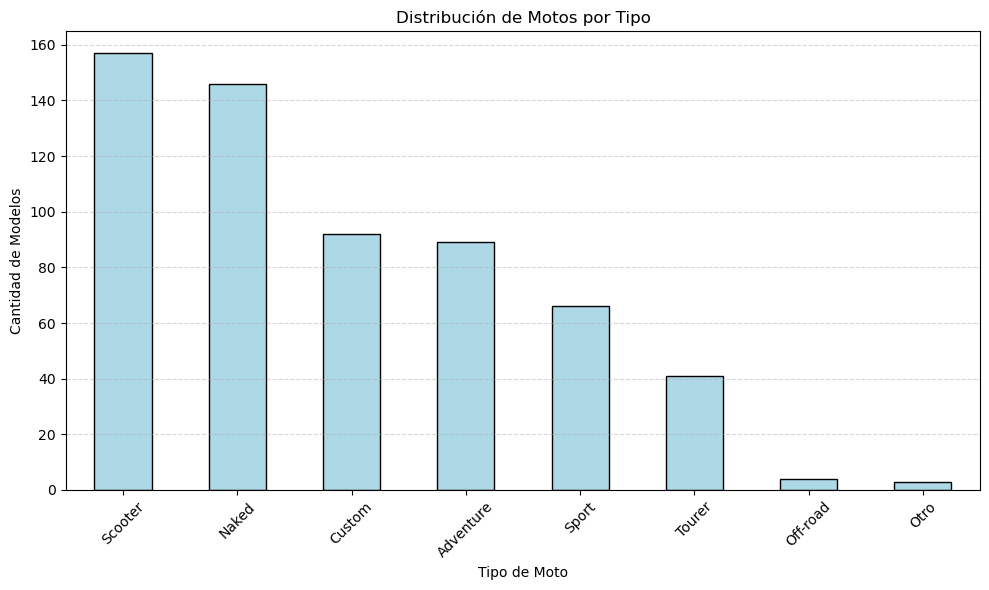

In [17]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('motofit_v3.csv')

# Cuántas motos hay por tipo (TIPO_SIMPLIFICADO)
cantidad_tipos = df['TIPO_SIMPLIFICADO'].value_counts().sort_values(ascending=False)


print("=== Cantidad de motos por tipo de moto ===")
print(cantidad_tipos)

# Gráfico de barras
plt.figure(figsize=(10, 6))  
cantidad_tipos.plot(kind='bar', color='lightblue', edgecolor='black')

# Etiquetas y título
plt.title('Distribución de Motos por Tipo')
plt.xlabel('Tipo de Moto')
plt.ylabel('Cantidad de Modelos')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

plt.show()




IDEA: ¿Sabías que las Scooter y Naked dominan el catálogo actual de motos?
Son las más accesibles, versátiles y populares. Pero también hay una reñida competencia entre las Custom (estilo y confort) y las Adventure (viajes largos y espíritu libre). He clasificado más de 500 modelos para ayudarte a navegar el mercado.

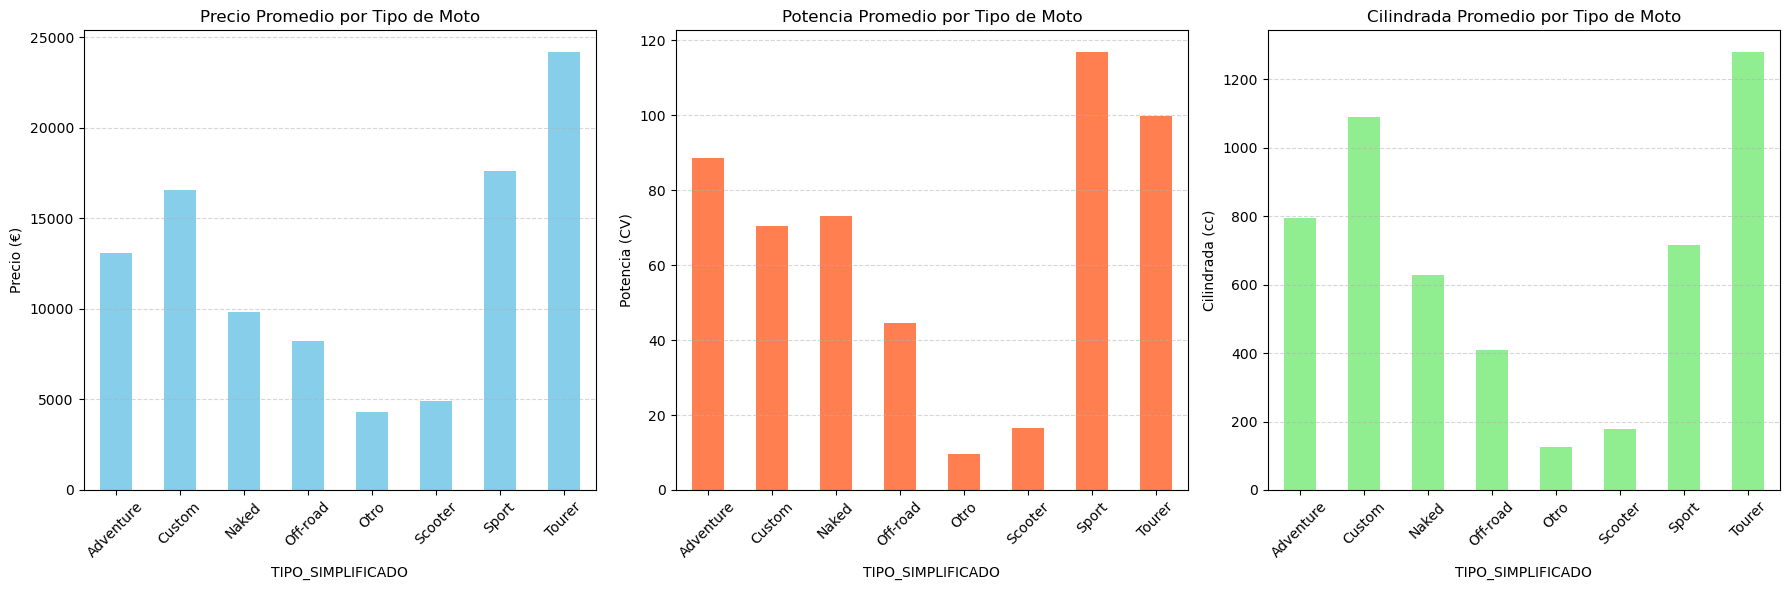

In [13]:
# Asegurar columnas numéricas
for col in ['PRECIO', 'POTENCIA', 'CILINDRADA']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Calcular promedios
triangulo = df.groupby('TIPO_SIMPLIFICADO')[['PRECIO', 'POTENCIA', 'CILINDRADA']].mean()

# Orden alfabético de tipos
orden_tipos = sorted(triangulo.index)

# Configurar figura
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# Precio
triangulo.loc[orden_tipos, 'PRECIO'].plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Precio Promedio por Tipo de Moto')
axes[0].set_ylabel('Precio (€)')
axes[0].set_xticklabels(orden_tipos, rotation=45)
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Potencia
triangulo.loc[orden_tipos, 'POTENCIA'].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Potencia Promedio por Tipo de Moto')
axes[1].set_ylabel('Potencia (CV)')
axes[1].set_xticklabels(orden_tipos, rotation=45)
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Cilindrada
triangulo.loc[orden_tipos, 'CILINDRADA'].plot(kind='bar', ax=axes[2], color='lightgreen')
axes[2].set_title('Cilindrada Promedio por Tipo de Moto')
axes[2].set_ylabel('Cilindrada (cc)')
axes[2].set_xticklabels(orden_tipos, rotation=45)
axes[2].grid(axis='y', linestyle='--', alpha=0.5)

# Mostrar
plt.tight_layout()
plt.show()


Las Tourer y Sport dominan en precio y potencia.
Las Custom tienen motores grandes, pero entregan potencia de forma más relajada.
Las Naked muestran un equilibrio perfecto entre rendimiento, precio y cilindrada.
Las Scooters están en el extremo opuesto: más económicas, accesibles y orientadas a ciudad.

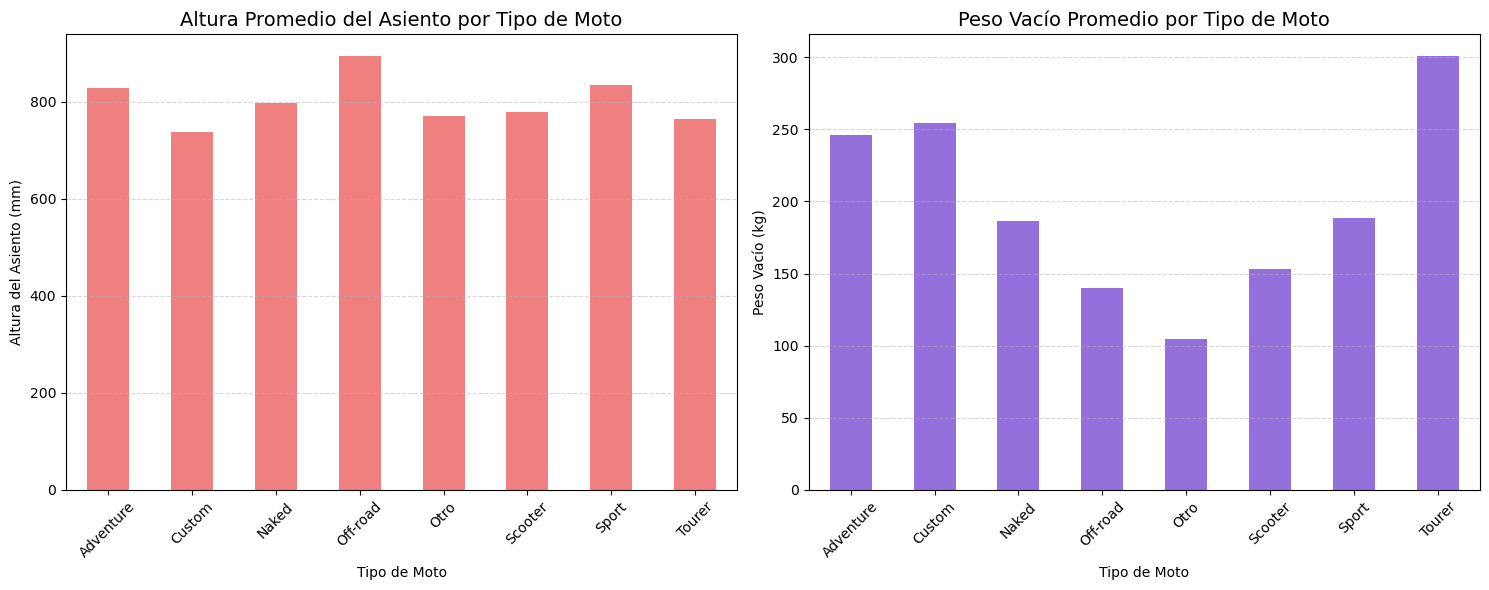


Tabla de Promedios de Ergonomía por Tipo de Moto:
                   ALTURA_ASIENTO  PESO_VACIO
TIPO_SIMPLIFICADO                            
Adventure              827.708861  246.094937
Custom                 738.266667  254.250000
Naked                  797.258741  186.321678
Off-road               895.000000  139.750000
Otro                   770.333333  104.333333
Scooter                777.692623  153.155738
Sport                  833.523810  188.441270
Tourer                 763.634146  301.024390


In [14]:
import numpy as np

# 2. Asegurar columnas numéricas
for col in ['PRECIO', 'POTENCIA', 'CILINDRADA', 'ALTURA_ASIENTO', 'PESO_VACIO']:
    df[col] = pd.to_numeric(df[col], errors='coerce')


df.dropna(subset=['ALTURA_ASIENTO', 'PESO_VACIO'], inplace=True)

# Calcular promedios por tipo de moto simplificado
ergonomia_promedio = df.groupby('TIPO_SIMPLIFICADO')[['ALTURA_ASIENTO', 'PESO_VACIO']].mean()

# Ordenar alfabéticamente los tipos para consistencia en los gráficos
orden_tipos = sorted(ergonomia_promedio.index)

# Configurar la figura y los subplots para los dos gráficos
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6)) # Un row, dos columnas para los gráficos

# Gráfico para ALTURA_ASIENTO Promedio
ergonomia_promedio.loc[orden_tipos, 'ALTURA_ASIENTO'].plot(kind='bar', ax=axes[0], color='lightcoral')
axes[0].set_title('Altura Promedio del Asiento por Tipo de Moto', fontsize=14)
axes[0].set_ylabel('Altura del Asiento (mm)')
axes[0].set_xlabel('Tipo de Moto')
axes[0].tick_params(axis='x', rotation=45) 
axes[0].grid(axis='y', linestyle='--', alpha=0.5) 

# Gráfico para PESO_VACIO Promedio
ergonomia_promedio.loc[orden_tipos, 'PESO_VACIO'].plot(kind='bar', ax=axes[1], color='mediumpurple')
axes[1].set_title('Peso Vacío Promedio por Tipo de Moto', fontsize=14)
axes[1].set_ylabel('Peso Vacío (kg)')
axes[1].set_xlabel('Tipo de Moto')
axes[1].tick_params(axis='x', rotation=45) 
axes[1].grid(axis='y', linestyle='--', alpha=0.5) 

# Ajustar el layout para evitar solapamiento y mostrar el gráfico
plt.tight_layout()
plt.show()

print("\nTabla de Promedios de Ergonomía por Tipo de Moto:")
print(ergonomia_promedio.loc[orden_tipos])

In [15]:
# Mostrar como tabla simple
print(triangulo.loc[orden_tipos].round(1))


                    PRECIO  POTENCIA  CILINDRADA
TIPO_SIMPLIFICADO                               
Adventure          13085.2      88.6       793.1
Custom             16542.2      70.5      1089.3
Naked               9841.7      73.1       626.6
Off-road            8224.0      44.4       408.2
Otro                4313.3       9.6       124.3
Scooter             4930.0      16.5       179.2
Sport              17611.9     116.8       716.3
Tourer             24175.0      99.9      1278.8


En esta etapa, necesitamos extraer insights de mayor valor y además probar como se comportan los datos de cara un comparador que luego en futurs iteraciones se convertirá en el recomendaor de motos.

In [ ]:
# Motos más livianas para principiantes (A1 y A2) 
cols_num = ['PESO_VACIO', 'POTENCIA']
for col in cols_num:
    df[col] = pd.to_numeric(df[col], errors='coerce')

#filtramos por carnet principiante A1 A2
principiantes = df[df['CARNET_MINIMO'].isin(['A1','A2'])]

#exluimos aquellos que no tengan potencia (NaN ó eléctricas), y aquellos sin peso registrado
principiantes = principiantes[(principiantes['PESO_VACIO'].notna()) & (principiantes['POTENCIA'] > 8)]
principiantes.head()

,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA,CARNET_MINIMO,TIPO_CORREGIDO,TIPO_SIMPLIFICADO,PROPULSION
1,RX 125,A1,124.0,14.9,90/90-21,120/80-18,D260,D220,880.0,134.0,4199.0,APRILIA,A1,Off-road,Off-road,Combustión
2,SX 125,A1,124.0,14.9,90/90-21,120/80-18,D260,D220,880.0,134.0,4199.0,APRILIA,A1,Off-road,Off-road,Combustión
3,RS 125,A1,124.0,14.9,100/80-17,140/70ZR17,D300,D218,820.0,144.0,5499.0,APRILIA,A1,Sport,Sport,Combustión
4,Tuono 125,A1,124.0,14.9,100/80-17,140/70ZR17,D300,D218,799.0,144.0,5399.0,APRILIA,A1,Naked,Naked,Combustión
5,SR GT 125,A1,124.0,14.9,110/80-14,130/70-13,D260,D220,799.0,148.0,4099.0,APRILIA,A1,Scooter,Scooter,Combustión


In [ ]:
top_livianas = principiantes.sort_values(by='PESO_VACIO').head(5)
top_livianas = top_livianas[['MARCA', 'MODELO', 'CARNET_MINIMO', 'TIPO_SIMPLIFICADO', 'POTENCIA','PESO_VACIO']]
print(top_livianas)

      MARCA      MODELO CARNET_MINIMO TIPO_SIMPLIFICADO  POTENCIA  \
547  YAMAHA    D’elight            A1           Scooter       8.4   
335    MITT      RT 125            A1           Scooter       9.5   
168   HONDA     MSX 125            A1              Otro      10.0   
164   HONDA  Vision 110            A1           Scooter       8.7   
331    MITT   Urban 125            A1           Scooter       9.0   

     ALTURA_ASIENTO  PESO_VACIO  
547           800.0       101.0  
335           760.0       102.0  
168           761.0       102.0  
164           770.0       102.0  
331           765.0       104.0  


INSIGHT 2 POTENCIA -  PRECIO - TIPO

C:\Users\rodri\AppData\Local\Temp\ipykernel_3088\2214060823.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['POTENCIA_POR_100_EUROS'] = (df_clean['POTENCIA'] / df_clean['PRECIO']) * 100


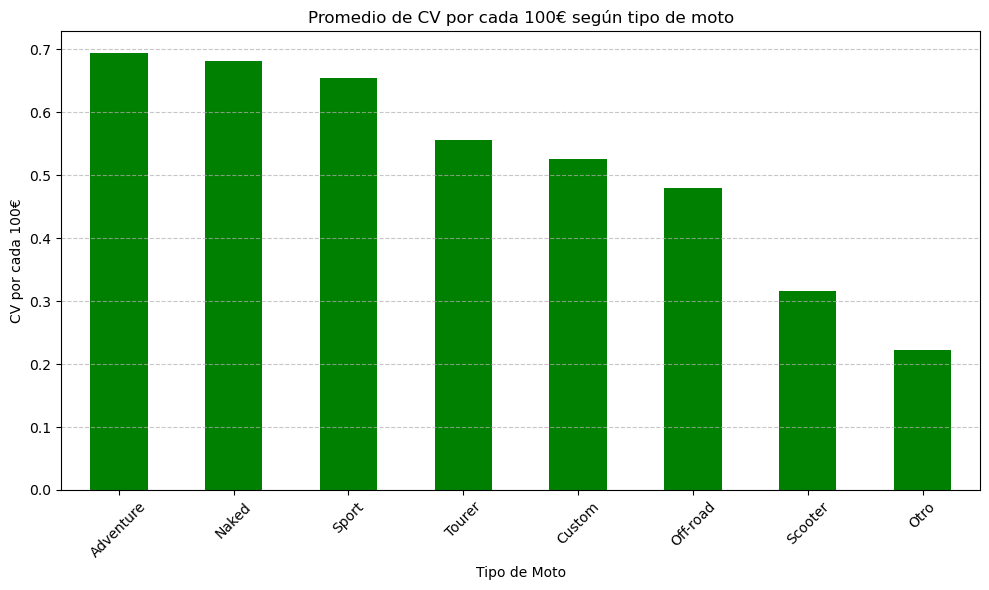

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv("motofit_v3.csv")

df['POTENCIA'] = pd.to_numeric(df['POTENCIA'], errors='coerce')
df['PRECIO'] = pd.to_numeric(df['PRECIO'], errors='coerce')

# Eliminar las motos sin datos de potencia o precio
df_clean = df.dropna(subset=['POTENCIA', 'PRECIO'])

# Calcular cuántos caballos entrega cada moto por cada 100€
df_clean['POTENCIA_POR_100_EUROS'] = (df_clean['POTENCIA'] / df_clean['PRECIO']) * 100

# Agrupar por tipo de moto y calcular el promedio de esa métrica
potencia_por_100 = df_clean.groupby('TIPO_SIMPLIFICADO')['POTENCIA_POR_100_EUROS'].mean().sort_values(ascending=False)

# Crear gráfico
plt.figure(figsize=(10, 6))
potencia_por_100.plot(kind='bar', color='green')
plt.title('Promedio de CV por cada 100€ según tipo de moto')
plt.ylabel('CV por cada 100€')
plt.xlabel('Tipo de Moto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


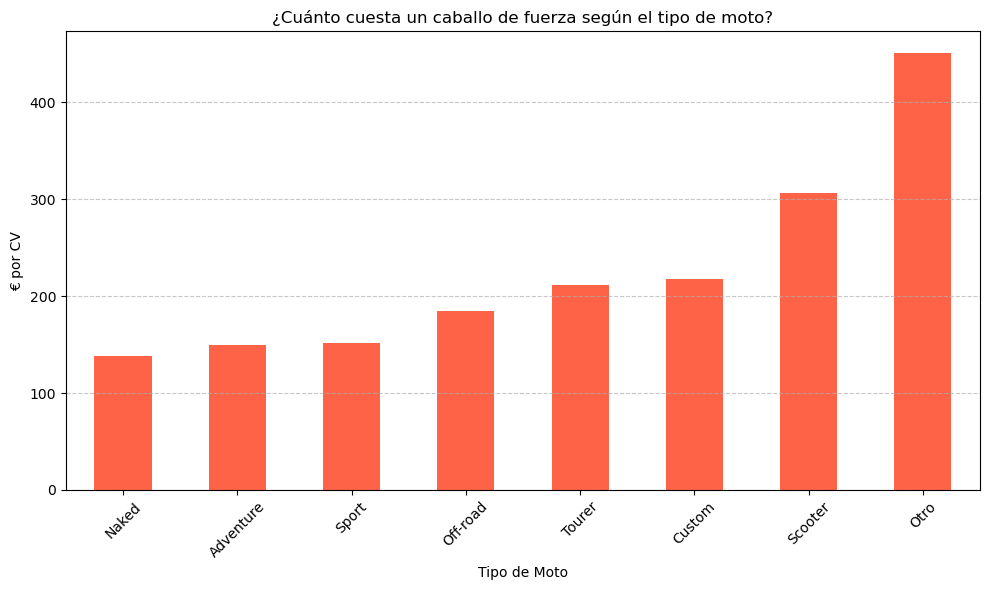

In [7]:
# Agrupamos por tipo y calculamos promedios de PRECIO y POTENCIA
promedios = df_clean.groupby('TIPO_SIMPLIFICADO')[['PRECIO', 'POTENCIA']].mean()

# Calculamos el precio por caballo de fuerza
promedios['EUROS_POR_CV'] = promedios['PRECIO'] / promedios['POTENCIA']

# Ordenamos para visualizar
euros_por_cv = promedios['EUROS_POR_CV'].sort_values()

# Gráfico
plt.figure(figsize=(10, 6))
euros_por_cv.plot(kind='bar', color='tomato')
plt.title('¿Cuánto cuesta un caballo de fuerza según el tipo de moto?')
plt.ylabel('€ por CV')
plt.xlabel('Tipo de Moto')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [4]:
def nivel_accesibilidad(altura):
    if altura < 770:
        return 'Alta comodidad'
    elif altura <= 800:
        return 'Aceptable'
    else:
        return 'Alta para 1.70'

df['ACCESIBILIDAD_170'] = df['ALTURA_ASIENTO'].apply(nivel_accesibilidad)
df.head(10)


,MODELO,CON_CARNET,CILINDRADA,POTENCIA,RUEDA_DELANTERA,RUEDA_TRASERA,FRENO_DELANTERO,FRENO_TRASERO,ALTURA_ASIENTO,PESO_VACIO,PRECIO,MARCA,CARNET_MINIMO,TIPO_CORREGIDO,TIPO_SIMPLIFICADO,PROPULSION,ACCESIBILIDAD_170
0,SXR,AM,49.0,3.2,120/70-12,120/70-12,D220,D220,775.0,NaN,2599.0,APRILIA,AM,Scooter,Scooter,Combustión,Aceptable
1,RX 125,A1,124.0,14.9,90/90-21,120/80-18,D260,D220,880.0,134.0,4199.0,APRILIA,A1,Off-road,Off-road,Combustión,Alta para 1.70
2,SX 125,A1,124.0,14.9,90/90-21,120/80-18,D260,D220,880.0,134.0,4199.0,APRILIA,A1,Off-road,Off-road,Combustión,Alta para 1.70
3,RS 125,A1,124.0,14.9,100/80-17,140/70ZR17,D300,D218,820.0,144.0,5499.0,APRILIA,A1,Sport,Sport,Combustión,Alta para 1.70
4,Tuono 125,A1,124.0,14.9,100/80-17,140/70ZR17,D300,D218,799.0,144.0,5399.0,APRILIA,A1,Naked,Naked,Combustión,Aceptable
5,SR GT 125,A1,124.0,14.9,110/80-14,130/70-13,D260,D220,799.0,148.0,4099.0,APRILIA,A1,Scooter,Scooter,Combustión,Aceptable
6,SR GT ABS 125,A1,124.0,14.9,110/80-14,130/70-13,D260,D220,799.0,150.0,4199.0,APRILIA,A1,Scooter,Scooter,Combustión,Aceptable
7,SR GT Sport 125,A1,124.0,14.9,110/80-14,130/70-13,D260,D220,799.0,148.0,4099.0,APRILIA,A1,Scooter,Scooter,Combustión,Aceptable
8,SR GT Sport ABS 125,A1,124.0,14.9,110/80-14,130/70-13,D260,D220,799.0,150.0,4199.0,APRILIA,A1,Scooter,Scooter,Combustión,Aceptable
9,RS 457,A2,457.0,48.0,110/70ZR17,150/60ZR17,2D320,D220,820.0,175.0,7199.0,APRILIA,A2,Sport,Sport,Combustión,Alta para 1.70


Momento de ampliar la oferta de "filtros" para poder empezar el prototipo de la App.

In [16]:
import pandas as pd

df = pd.read_csv("motofit_limpio.csv")

# Asegurar tipos numéricos correctos
for col in ['PRECIO', 'ALTURA_ASIENTO', 'PESO_VACIO']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Listas únicas
tipos_disponibles = sorted(df['TIPO_SIMPLIFICADO'].dropna().unique())
marcas_disponibles = sorted(df['MARCA'].dropna().unique())

# Función de recomendación
def recomendar_motos(precio_min, precio_max, carnet, altura_usuario, tipo_moto=None, marca=None, peso_max=None):
    df_filtrado = df.copy()

    # Precio mínimo y máximo
    df_filtrado = df_filtrado[(df_filtrado['PRECIO'] >= precio_min) & (df_filtrado['PRECIO'] <= precio_max)]

    # Carnet
    carnet_orden = {'A1': 1, 'A2': 2, 'A': 3}
    carnet_usuario = carnet_orden.get(carnet.upper(), 1)
    df_filtrado = df_filtrado[df_filtrado['CARNET_MINIMO'].map(carnet_orden) <= carnet_usuario]

    # Altura (convertida a mm)
    altura_max = (altura_usuario * 0.46 - 3) * 10
    df_filtrado = df_filtrado[df_filtrado['ALTURA_ASIENTO'] <= altura_max]

    # Tipo (opcional)
    if tipo_moto:
        df_filtrado = df_filtrado[df_filtrado['TIPO_SIMPLIFICADO'].str.lower() == tipo_moto.lower()]

    # Marca (opcional)
    if marca:
        df_filtrado = df_filtrado[df_filtrado['MARCA'].str.lower() == marca.lower()]

    # Peso máximo (opcional)
    if peso_max:
        df_filtrado = df_filtrado[df_filtrado['PESO_VACIO'] <= peso_max]

    # Columnas clave
    columnas = ['MARCA', 'MODELO', 'TIPO_SIMPLIFICADO', 'PRECIO', 'CARNET_MINIMO', 'ALTURA_ASIENTO', 'PESO_VACIO', 'POTENCIA']
    return df_filtrado[columnas].sort_values(by='PRECIO').reset_index(drop=True)



In [17]:
print("🛵 Bienvenido al recomendador MotoFit 🧠\n")

print(f"Tipos disponibles: {', '.join(tipos_disponibles)}")
print(f"Marcas disponibles: {', '.join(marcas_disponibles)}\n")

precio_min = float(input("💸 ¿Cuál es tu presupuesto mínimo (€)? "))
precio_max = float(input("💰 ¿Cuál es tu presupuesto máximo (€)? "))
carnet = input("🎫 ¿Qué carnet tienes (A1, A2, A)? ")
altura = int(input("📏 ¿Cuál es tu estatura (en cm)? "))
tipo = input("🔧 Tipo de moto (opcional): ")
marca = input("🏷️ Marca deseada (opcional): ")
peso_max = input("🏋️ ¿Peso máximo deseado (kg)? (opcional): ")

# Procesar entradas
tipo_moto = tipo.strip() if tipo.strip() else None
marca_input = marca.strip() if marca.strip() else None
peso_maximo = float(peso_max) if peso_max.strip() else None

# Ejecutar recomendación
resultado = recomendar_motos(precio_min, precio_max, carnet, altura, tipo_moto, marca_input, peso_maximo)

# Mostrar
if resultado.empty:
    print("\n❌ No se encontraron motos que cumplan con los criterios.\n")
else:
    print("\n✅ Motos recomendadas para ti:\n")
    print(resultado.to_string(index=False))


🛵 Bienvenido al recomendador MotoFit 🧠

Tipos disponibles: Adventure, Custom, Naked, Off-road, Otro, Scooter, Sport, Tourer
Marcas disponibles: APRILIA, BENELLI, BMW, CF MOTO, DUCATI, HARLEY DAVIDSON, HONDA, HUSQVARNA, INDIAN, KAWASAKI, KEEWAY, KTM, KYMCO, MITT, MORBIDELLI, MOTO GUZZI, PEUGEOT, PIAGGIO, ROYAL ENFIELD, SUZUKI, SYM, TRIUMPH, VOGE, YAMAHA, ZONTES


✅ Motos recomendadas para ti:

     MARCA               MODELO TIPO_SIMPLIFICADO  PRECIO CARNET_MINIMO  ALTURA_ASIENTO  PESO_VACIO  POTENCIA
      VOGE               900DSX         Adventure  9192.0            A2           825.0       215.0      95.0
  KAWASAKI           Versys 650         Adventure  9299.0            A2           840.0       217.0      69.0
    SUZUKI          V-Strom 650         Adventure  9475.0            A2           835.0       214.0      70.0
    SUZUKI       V-Strom 650 XT         Adventure  9975.0            A2           835.0       216.0      70.0
   CF MOTO          800MT Sport         Adventure  999

In [6]:
#incorporando Vespa al dataset
 
import pandas as pd

# 1. Cargar los archivos
df_limpio = pd.read_csv('../data/motofit_limpio.csv')
df_vespa = pd.read_csv('../data/raw/vespa.csv')

# 2. Renombrar columnas del archivo Vespa si es necesario
df_vespa.rename(columns={
    'Modelo': 'MODELO',
    'Cilindrada': 'CILINDRADA',
    'Potencia': 'POTENCIA',
    'Freno_Del': 'FRENO_DELANTERO',
    'Freno_Tras': 'FRENO_TRASERO',
    'Rueda_Del': 'NEUMATICO_DELANTERO',
    'Rueda_Tras': 'NEUMATICO_TRASERO',
    'Altura_Asiento': 'ALTURA_ASIENTO',
    'Peso': 'PESO_VACIO',
    'Precio': 'PRECIO',
    'Carnet': 'CARNET_MINIMO'
}, inplace=True)

# 3. Agregar columna de marca
df_vespa['MARCA'] = 'VESPA'

# 4. Estimar PROPULSION y TIPO_CORREGIDO manualmente
# Vespa tiene modelos eléctricos y de combustión, asumimos basado en el nombre
df_vespa['PROPULSION'] = df_vespa['MODELO'].str.contains('Ellectrica|Elett|electric', case=False).map({True: 'Eléctrica', False: 'Combustión'})

# 5. Asignar tipo corregido a 'Scooter' (todas las Vespas lo son)
df_vespa['TIPO_CORREGIDO'] = 'Scooter'
df_vespa['TIPO_SIMPLIFICADO'] = 'Scooter'

# 6. Asegurar formato numérico correcto
for col in ['CILINDRADA', 'POTENCIA', 'PESO_VACIO', 'ALTURA_ASIENTO', 'PRECIO']:
    df_vespa[col] = pd.to_numeric(df_vespa[col], errors='coerce')

# 7. Obtener orden de columnas desde el dataset limpio
columnas_ordenadas = df_limpio.columns.tolist()

# 8. Asegurar que df_vespa tenga todas las columnas necesarias
for col in columnas_ordenadas:
    if col not in df_vespa.columns:
        df_vespa[col] = None

# 9. Reordenar columnas
df_vespa = df_vespa[columnas_ordenadas]

# 10. Concatenar
df_actualizado = pd.concat([df_limpio, df_vespa], ignore_index=True)

# 11. Guardar
df_actualizado.to_csv('motofit_limpio_con_vespa.csv', index=False)

print("✅ Vespa integrada correctamente y archivo guardado como 'motofit_limpio_con_vespa.csv'")


✅ Vespa integrada correctamente y archivo guardado como 'motofit_limpio_con_vespa.csv'
